# Describe the dataset

This is a heart disease dataset, published in UCI repository: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/.

The dataset is about two-class classfication task. Class '1' represents Absence (Positive), while Class '2' represents Presence (Negative).
The dataset has totally 270 instances with no missing values. Each instance originally has 13 features and 1 label. The following shows their names and types.


Attribute information:
1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl 
7. resting electrocardiographic results (values 0,1,2) 
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. label: Absence (1) or presence (2) of heart disease 

Attributes types:
Real: 1,4,5,8,10,12;
Ordered: 11;
Binary: 2,6,9; 
Nominal: 3,7,13.

Here the 3,7,13 features are categorical. So I do the One-Hot Encoding in the preprocessing. After preprocessing the dataset expands to 20 features. Below is the features information after preprocessing.

0. age 
1. sex  
2. resting blood pressure 
3. serum cholestoral in mg/dl 
4. fasting blood sugar > 120 mg/dl 
5. maximum heart rate achieved 
6. exercise induced angina 
7. oldpeak = ST depression induced by exercise relative to rest 
8. the slope of the peak exercise ST segment 
9. number of major vessels (0-3) colored by flourosopy 
10. label: Absence (1) or presence (2) of heart disease
11. chest pain type1
12. chest pain type2
13. chest pain type3
14. chest pain type4
15. resting electrocardiographic results=0
16. resting electrocardiographic results=0
17. resting electrocardiographic results=0
18. thal=3 (normal)
19. thal=6 (fixed defect)
20. thal=7 (reversable defect) 

# Load the dataset

In [2]:
import numpy as np
import pandas as pd

# load the dataset using pandas
data = pd.read_table('heart.data', header=None, sep=' ', index_col=False)  # returned "data" is an array_like.
print(data.shape)         # show the row numbers and column numbers of the dataset
data.head(10)             # show the first 10 rows of the dataset


(270, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,2


# Binarize the categorical features using One-Hot Encoding

In [3]:
data_enc = pd.get_dummies(data, columns=[2, 6, 12])
print(data_enc.shape)
data_enc.head(10)

(270, 21)


,0,1,3,4,5,7,8,9,10,11,...,2_1.0,2_2.0,2_3.0,2_4.0,6_0.0,6_1.0,6_2.0,12_3.0,12_6.0,12_7.0
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,2.0,3.0,...,0,0,0,1,0,0,1,1,0,0
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,2.0,0.0,...,0,0,1,0,0,0,1,0,0,1
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,1.0,0.0,...,0,1,0,0,1,0,0,0,0,1
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,2.0,1.0,...,0,0,0,1,1,0,0,0,0,1
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1.0,...,0,1,0,0,0,0,1,1,0,0
5,65.0,1.0,120.0,177.0,0.0,140.0,0.0,0.4,1.0,0.0,...,0,0,0,1,1,0,0,0,0,1
6,56.0,1.0,130.0,256.0,1.0,142.0,1.0,0.6,2.0,1.0,...,0,0,1,0,0,0,1,0,1,0
7,59.0,1.0,110.0,239.0,0.0,142.0,1.0,1.2,2.0,1.0,...,0,0,0,1,0,0,1,0,0,1
8,60.0,1.0,140.0,293.0,0.0,170.0,0.0,1.2,2.0,2.0,...,0,0,0,1,0,0,1,0,0,1
9,63.0,0.0,150.0,407.0,0.0,154.0,0.0,4.0,2.0,3.0,...,0,0,0,1,0,0,1,0,0,1


# Train-test split

In [4]:
from sklearn.model_selection import train_test_split
import pickle


feature_indices = [n for n in range(0, 10)] + [n for n in range(11, 21)]  # select the columns of features
X = data_enc.iloc[:, feature_indices]     
y = data_enc.iloc[:, 10]                  # select the column of label
#print(X)

# pseudorandomly train-test split to 2:1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    # Shuffle the data
#print(X_test, y_test)

# submit the dataset
target_names = ['Absence', 'Presence']
feature_names = ['age', 'sex', 'blood pressure', 'serum cholestoral', 'blood sugar > 120',
                'max heart rate', 'angina', 'oldpeak', 'slope', 'number of major vessels',
                'chest pain type1', 'chest pain type2', 'chest pain type3', 'chest pain type4',
                'electrocardiographic result=0', 'electrocardiographic result=1', 'electrocardiographic result=2',
                'thal=3', 'thal=6', 'thal=7']
a = {}
a['X_train'] = X_train
a['y_train'] = y_train
a['X_test'] = X_test
a['y_test'] = y_test
a['target_names'] = target_names
a['feature_names'] = feature_names
pickle.dump(a, open("rzou15.pickle", "wb"))

# Train L2-regularized LogisticRegression classifier

In [5]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(penalty='l2')
clf = clf.fit(X_train, y_train)

weights = clf.coef_[0]
topftr_idx = np.argsort(np.abs(weights))[::-1][:10]   # indices of top 10 features with highest absolute weight
print('Top 10 features and their weights:')
for i in range(10):
    print('    %s: %f' % (feature_names[topftr_idx[i]], weights[topftr_idx[i]]))


Top 10 features and their weights:
    sex: 0.872585
    chest pain type4: 0.819599
    thal=3: -0.778366
    number of major vessels: 0.717473
    angina: 0.704822
    chest pain type1: -0.610543
    chest pain type3: -0.604079
    slope: 0.601087
    oldpeak: 0.557287
    thal=7: 0.361620


# Train L1-regularized LogisticRegression classifier

In [6]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(penalty='l1')
clf = clf.fit(X_train, y_train)

weights = clf.coef_[0]
topftr_idx = np.argsort(np.abs(weights))[::-1][:10]   # indices of top 10 features with highest absolute weight
print('Top 10 features and their weights:')
for i in range(10):
    print('    %s: %f' % (feature_names[topftr_idx[i]], weights[topftr_idx[i]]))


Top 10 features and their weights:
    chest pain type4: 1.148711
    thal=3: -1.009060
    sex: 0.788789
    number of major vessels: 0.668198
    angina: 0.655355
    oldpeak: 0.529129
    slope: 0.509064
    chest pain type3: -0.204967
    chest pain type1: -0.075325
    thal=7: 0.046447


# Train DecisionTree classifier

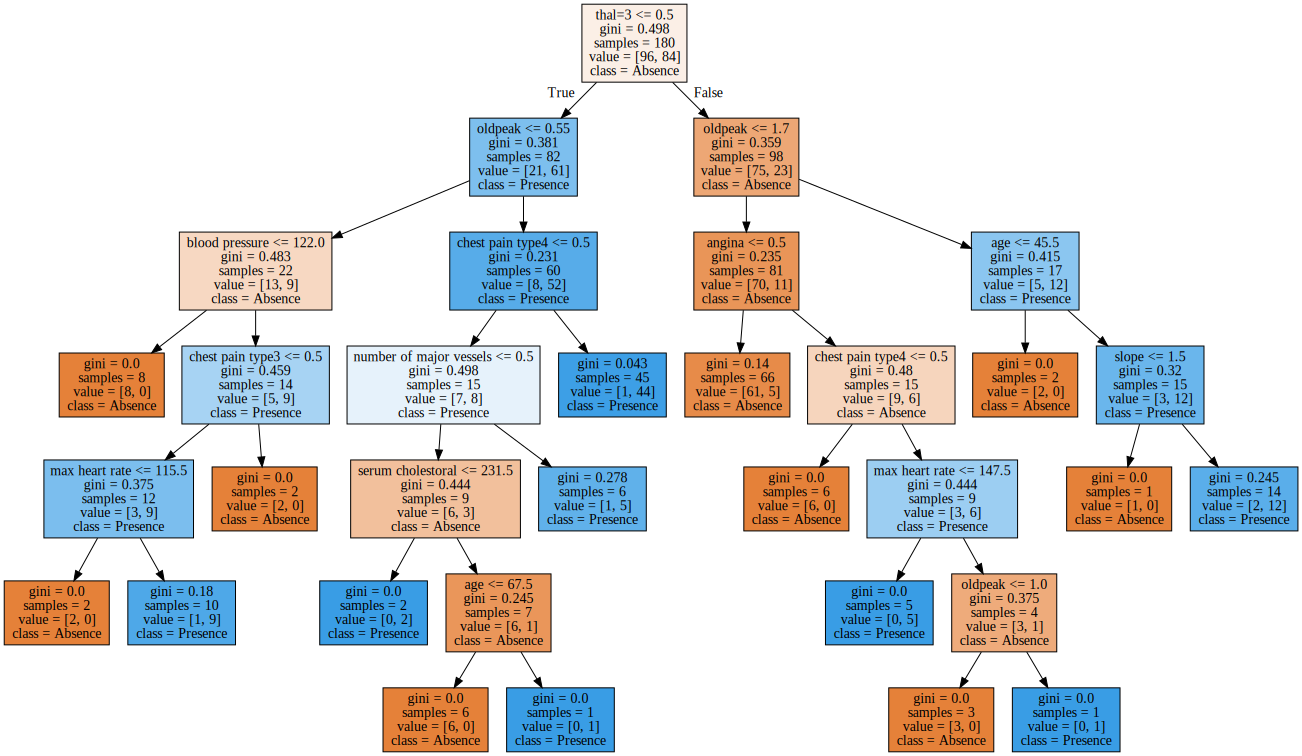

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

clf = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=target_names, filled='True')
graph = graphviz.Source(dot_data)
graph

# Discuss the result

1. from the model results, we can see these three models have general similarity, for example, they all take "thal=3" as important feature (top 3), and they all take "thal=7" as least important feature. But of course, they are different in specific in choosing top-important features.

2. L2 and L1 differs and this is may be because L2 forces the large weights to get closer to zero and places an emphasis on the large weights, while L1 emphasis is not necessarily on the large weights.

#  z-score all features

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)


# Train L2-regularized LogisticRegression classifier After scoring

In [9]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(penalty='l2')
clf = clf.fit(Xs_train, y_train)

weights = clf.coef_[0]
topftr_idx = np.argsort(np.abs(weights))[::-1][:10]   # indices of top 10 features with highest absolute weight
print('Top 10 features and their weights:')
for i in range(10):
    print('    %s: %f' % (feature_names[topftr_idx[i]], weights[topftr_idx[i]]))


Top 10 features and their weights:
    number of major vessels: 0.805474
    sex: 0.801169
    slope: 0.635853
    oldpeak: 0.622091
    angina: 0.520850
    chest pain type4: 0.488259
    chest pain type1: -0.352286
    chest pain type3: -0.336152
    blood pressure: 0.307174
    serum cholestoral: 0.267067


In [ ]:
# Train L1-regularized LogisticRegression classifier After scoring

In [10]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(penalty='l1')
clf = clf.fit(Xs_train, y_train)

weights = clf.coef_[0]
topftr_idx = np.argsort(np.abs(weights))[::-1][:10]   # indices of top 10 features with highest absolute weight
print('Top 10 features and their weights:')
for i in range(10):
    print('    %s: %f' % (feature_names[topftr_idx[i]], weights[topftr_idx[i]]))


Top 10 features and their weights:
    number of major vessels: 0.763579
    sex: 0.700437
    oldpeak: 0.601320
    slope: 0.559377
    chest pain type4: 0.529076
    angina: 0.465624
    thal=3: -0.282400
    chest pain type1: -0.260830
    blood pressure: 0.253993
    chest pain type3: -0.244365


# Train DecisionTree classifier After scoring

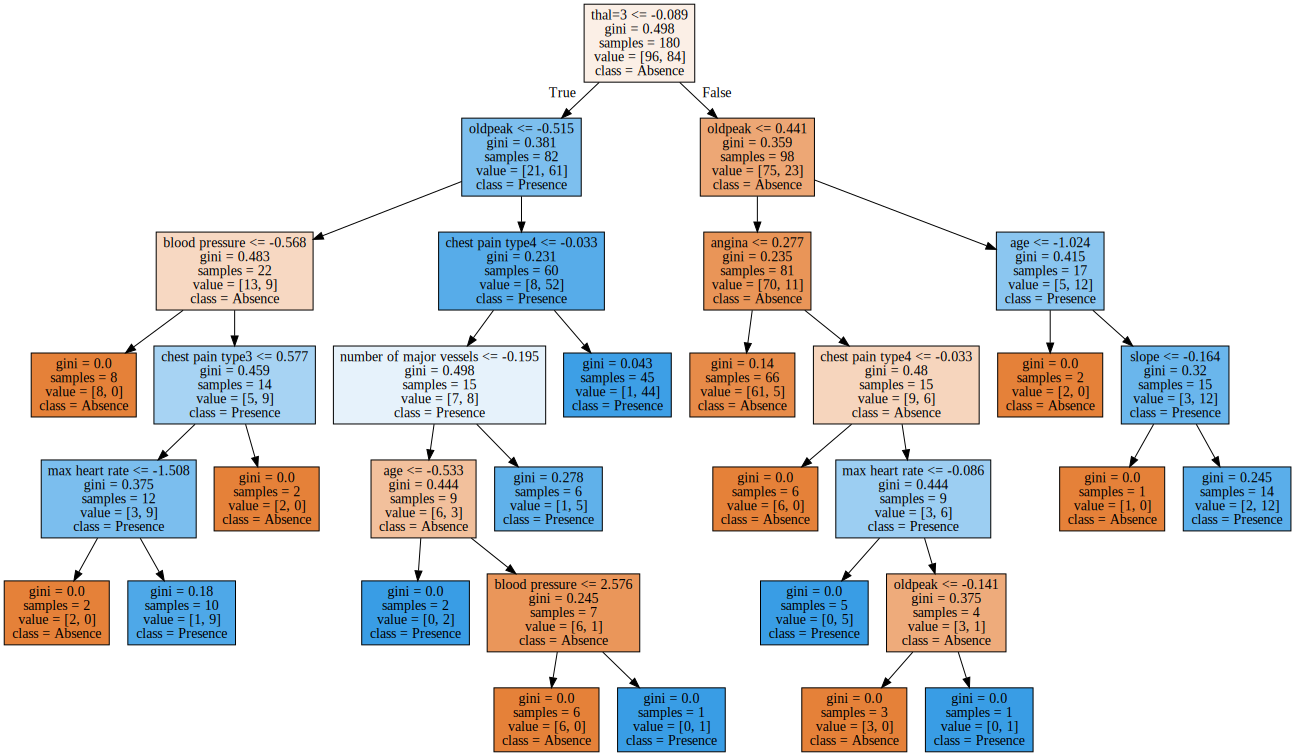

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

clf = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf = clf.fit(Xs_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=target_names, filled='True')
graph = graphviz.Source(dot_data)
graph

# Discuss the result after scoring

1. We can see very different top-important features selection in all these three models. This is maybe because after scoring the data can become more "standard", removing the effect of strangely large features.

2. But still a few features are same important as well in three models, like "sex", comparing before scoring and after scoring.

# The most positive object with respect to the probabilities

In [12]:
clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(Xs_train, y_train)
pred = clf.predict_proba(Xs_test)
#pred   # class1 = Absence(Positive), class2=Presence(Negative)


min_idx = np.argmin(pred, axis=0)  # select the instance index of least positive and least negative
print(min_idx)                     # the most positive object is min_idx[1], the most negative object is min_idx[0]

[55 44]


In [13]:
# the total positive evidence
tpe = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[min_idx[1]][j]) > 0:    # positive evidence is the positive product by the feature value and the weight.
        tpe += clf.coef_[0][j] * Xs_test[min_idx[1]][j]
print("The total positive evidence is %f" % tpe)


# the total negative evidence
tne = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[min_idx[1]][j]) < 0:   # negative evidence is the negative product by the feature value and the weight.
        tne += clf.coef_[0][j] * Xs_test[min_idx[1]][j]
print("The total negative evidence is %f" % tne)


# probability distribution
print("Probability distribution:")
print("    Absence(positive): %f" % pred[min_idx[1], 0])
print("    Presence(negative): %f" % pred[min_idx[1], 1])


# top 3 feature values that contribute most to the positive evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[min_idx[1]][j]
pe_top_idx = np.argsort(list(idx2evid.values()))[::-1][:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[pe_top_idx[0]], Xs_test[min_idx[1]][pe_top_idx[0]]))
print('    %s: %f' % (feature_names[pe_top_idx[1]], Xs_test[min_idx[1]][pe_top_idx[1]]))
print('    %s: %f' % (feature_names[pe_top_idx[2]], Xs_test[min_idx[1]][pe_top_idx[2]]))


# top 3 feature values that contribute the most to the negative evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[min_idx[1]][j]
ne_top_idx = np.argsort(list(idx2evid.values()))[:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[ne_top_idx[0]], Xs_test[min_idx[1]][ne_top_idx[0]]))
print('    %s: %f' % (feature_names[ne_top_idx[1]], Xs_test[min_idx[1]][ne_top_idx[1]]))
print('    %s: %f' % (feature_names[ne_top_idx[2]], Xs_test[min_idx[1]][ne_top_idx[2]]))


The total positive evidence is 0.393970
The total negative evidence is -5.962353
Probability distribution:
    Absence(positive): 0.996794
    Presence(negative): 0.003206
Top 3 features that contribute positive evidence and their values:
    max heart rate: 1.313455
    chest pain type1: -0.290409
    blood sugar > 120: -0.410891
Top 3 features that contribute positive evidence and their values:
    sex: -1.488048
    blood pressure: -2.112729
    slope: -0.981981


# The most negative object with respect to the probabilities

In [14]:
# the total positive evidence
tpe = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[min_idx[0]][j]) > 0:    # positive evidence is the positive product by the feature value and the weight.
        tpe += clf.coef_[0][j] * Xs_test[min_idx[0]][j]
print("The total positive evidence is %f" % tpe)


# the total negative evidence
tne = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[min_idx[0]][j]) < 0:   # negative evidence is the negative product by the feature value and the weight.
        tne += clf.coef_[0][j] * Xs_test[min_idx[0]][j]
print("The total negative evidence is %f" % tne)


# probability distribution
print("Probability distribution:")
print("    Absence(positive): %f" % pred[min_idx[0], 0])
print("    Presence(negative): %f" % pred[min_idx[0], 1])


# top 3 feature values that contribute most to the positive evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[min_idx[0]][j]
pe_top_idx = np.argsort(list(idx2evid.values()))[::-1][:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[pe_top_idx[0]], Xs_test[min_idx[0]][pe_top_idx[0]]))
print('    %s: %f' % (feature_names[pe_top_idx[1]], Xs_test[min_idx[0]][pe_top_idx[1]]))
print('    %s: %f' % (feature_names[pe_top_idx[2]], Xs_test[min_idx[0]][pe_top_idx[2]]))


# top 3 feature values that contribute the most to the negative evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[min_idx[0]][j]
ne_top_idx = np.argsort(list(idx2evid.values()))[:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[ne_top_idx[0]], Xs_test[min_idx[0]][ne_top_idx[0]]))
print('    %s: %f' % (feature_names[ne_top_idx[1]], Xs_test[min_idx[0]][ne_top_idx[1]]))
print('    %s: %f' % (feature_names[ne_top_idx[2]], Xs_test[min_idx[0]][ne_top_idx[2]]))


The total positive evidence is 6.321740
The total negative evidence is -0.681033
Probability distribution:
    Absence(positive): 0.004196
    Presence(negative): 0.995804
Top 3 features that contribute positive evidence and their values:
    slope: 2.291288
    oldpeak: 1.853079
    angina: 1.314257
Top 3 features that contribute positive evidence and their values:
    number of major vessels: -0.711845
    max heart rate: -0.419713
    electrocardiographic result=2: 0.967204


# The object that has the largest positive evidence

In [15]:
# calculate the object index
pe_all = []
for i in range(len(X_test.index)):
    pe = []
    for j in range(len(feature_names)):
        if (clf.coef_[0][j] * Xs_test[i][j]) > 0:
            pe.append(clf.coef_[0][j] * Xs_test[i][j])
    pe_all.append(np.sum(pe))
obj_idx = np.argmax(pe_all)


# the total positive evidence
tpe = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[obj_idx][j]) > 0:    # positive evidence is the positive product by the feature value and the weight.
        tpe += clf.coef_[0][j] * Xs_test[obj_idx][j]
print("The total positive evidence is %f" % tpe)


# the total negative evidence
tne = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[obj_idx][j]) < 0:   # negative evidence is the negative product by the feature value and the weight.
        tne += clf.coef_[0][j] * Xs_test[obj_idx][j]
print("The total negative evidence is %f" % tne)


# probability distribution
print("Probability distribution:")
print("    Absence(positive): %f" % pred[obj_idx, 0])
print("    Presence(negative): %f" % pred[obj_idx, 1])


# top 3 feature values that contribute most to the positive evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[obj_idx][j]
pe_top_idx = np.argsort(list(idx2evid.values()))[::-1][:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[pe_top_idx[0]], Xs_test[obj_idx][pe_top_idx[0]]))
print('    %s: %f' % (feature_names[pe_top_idx[1]], Xs_test[obj_idx][pe_top_idx[1]]))
print('    %s: %f' % (feature_names[pe_top_idx[2]], Xs_test[obj_idx][pe_top_idx[2]]))


# top 3 feature values that contribute the most to the negative evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[obj_idx][j]
ne_top_idx = np.argsort(list(idx2evid.values()))[:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[ne_top_idx[0]], Xs_test[obj_idx][ne_top_idx[0]]))
print('    %s: %f' % (feature_names[ne_top_idx[1]], Xs_test[obj_idx][ne_top_idx[1]]))
print('    %s: %f' % (feature_names[ne_top_idx[2]], Xs_test[obj_idx][ne_top_idx[2]]))


The total positive evidence is 6.424562
The total negative evidence is -1.640631
Probability distribution:
    Absence(positive): 0.009828
    Presence(negative): 0.990172
Top 3 features that contribute positive evidence and their values:
    number of major vessels: 2.388124
    oldpeak: 2.351541
    serum cholestoral: 3.006105
Top 3 features that contribute positive evidence and their values:
    sex: -1.488048
    angina: -0.760886
    electrocardiographic result=2: 0.967204


# The object that has the largest negative evidence

In [16]:
# calculate the object index
ne_all = []
for i in range(len(X_test.index)):
    ne = []
    for j in range(len(feature_names)):
        if (clf.coef_[0][j] * Xs_test[i][j]) < 0:
            ne.append(clf.coef_[0][j] * Xs_test[i][j])
    ne_all.append(np.sum(ne))
obj_idx = np.argmin(ne_all)


# the total positive evidence
tpe = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[obj_idx][j]) > 0:    # positive evidence is the positive product by the feature value and the weight.
        tpe += clf.coef_[0][j] * Xs_test[obj_idx][j]
print("The total positive evidence is %f" % tpe)


# the total negative evidence
tne = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[obj_idx][j]) < 0:   # negative evidence is the negative product by the feature value and the weight.
        tne += clf.coef_[0][j] * Xs_test[obj_idx][j]
print("The total negative evidence is %f" % tne)


# probability distribution
print("Probability distribution:")
print("    Absence(positive): %f" % pred[obj_idx, 0])
print("    Presence(negative): %f" % pred[obj_idx, 1])


# top 3 feature values that contribute most to the positive evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[obj_idx][j]
pe_top_idx = np.argsort(list(idx2evid.values()))[::-1][:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[pe_top_idx[0]], Xs_test[obj_idx][pe_top_idx[0]]))
print('    %s: %f' % (feature_names[pe_top_idx[1]], Xs_test[obj_idx][pe_top_idx[1]]))
print('    %s: %f' % (feature_names[pe_top_idx[2]], Xs_test[obj_idx][pe_top_idx[2]]))


# top 3 feature values that contribute the most to the negative evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[obj_idx][j]
ne_top_idx = np.argsort(list(idx2evid.values()))[:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[ne_top_idx[0]], Xs_test[obj_idx][ne_top_idx[0]]))
print('    %s: %f' % (feature_names[ne_top_idx[1]], Xs_test[obj_idx][ne_top_idx[1]]))
print('    %s: %f' % (feature_names[ne_top_idx[2]], Xs_test[obj_idx][ne_top_idx[2]]))


The total positive evidence is 0.393970
The total negative evidence is -5.962353
Probability distribution:
    Absence(positive): 0.996794
    Presence(negative): 0.003206
Top 3 features that contribute positive evidence and their values:
    max heart rate: 1.313455
    chest pain type1: -0.290409
    blood sugar > 120: -0.410891
Top 3 features that contribute positive evidence and their values:
    sex: -1.488048
    blood pressure: -2.112729
    slope: -0.981981


# The most uncertain object (the probabilities are closest to 0.5)

In [17]:
# calculate the object index
obj_idx = np.argmin(abs(np.diff(pred)))


# the total positive evidence
tpe = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[obj_idx][j]) > 0:    # positive evidence is the positive product by the feature value and the weight.
        tpe += clf.coef_[0][j] * Xs_test[obj_idx][j]
print("The total positive evidence is %f" % tpe)


# the total negative evidence
tne = 0
for j in range(len(feature_names)):
    if (clf.coef_[0][j] * Xs_test[obj_idx][j]) < 0:   # negative evidence is the negative product by the feature value and the weight.
        tne += clf.coef_[0][j] * Xs_test[obj_idx][j]
print("The total negative evidence is %f" % tne)


# probability distribution
print("Probability distribution:")
print("    Absence(positive): %f" % pred[obj_idx, 0])
print("    Presence(negative): %f" % pred[obj_idx, 1])


# top 3 feature values that contribute most to the positive evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[obj_idx][j]
pe_top_idx = np.argsort(list(idx2evid.values()))[::-1][:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[pe_top_idx[0]], Xs_test[obj_idx][pe_top_idx[0]]))
print('    %s: %f' % (feature_names[pe_top_idx[1]], Xs_test[obj_idx][pe_top_idx[1]]))
print('    %s: %f' % (feature_names[pe_top_idx[2]], Xs_test[obj_idx][pe_top_idx[2]]))


# top 3 feature values that contribute the most to the negative evidence
seq = list(range(len(feature_names)))
idx2evid = dict().fromkeys(seq)
for j in range(len(feature_names)):
    idx2evid[j] = clf.coef_[0][j] * Xs_test[obj_idx][j]
ne_top_idx = np.argsort(list(idx2evid.values()))[:3]
print('Top 3 features that contribute positive evidence and their values:')
print('    %s: %f' % (feature_names[ne_top_idx[0]], Xs_test[obj_idx][ne_top_idx[0]]))
print('    %s: %f' % (feature_names[ne_top_idx[1]], Xs_test[obj_idx][ne_top_idx[1]]))
print('    %s: %f' % (feature_names[ne_top_idx[2]], Xs_test[obj_idx][ne_top_idx[2]]))


The total positive evidence is 2.473712
The total negative evidence is -2.317025
Probability distribution:
    Absence(positive): 0.503638
    Presence(negative): 0.496362
Top 3 features that contribute positive evidence and their values:
    angina: 1.314257
    sex: 0.672022
    chest pain type4: 0.967204
Top 3 features that contribute positive evidence and their values:
    slope: -0.981981
    oldpeak: -0.971539
    number of major vessels: -0.711845
